## Model Selection

### Logistic Regression Classifier

In [ ]:
# Logistic Regression Classifier
logreg=LogisticRegression()
logreg.fit(X_sm,y_sm)
y_logreg=logreg.predict(original_Xtest)
y_logreg_prob=logreg.predict_proba(original_Xtest)[:,1]

In [ ]:
# Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(original_ytest,y_logreg))
print("Accuracy:",metrics.accuracy_score(original_ytest,y_logreg))
print("Precision:",metrics.precision_score(original_ytest,y_logreg))
print("Recall:",metrics.recall_score(original_ytest,y_logreg))
print("F1-Score:",metrics.f1_score(original_ytest,y_logreg))
print("AUC:",metrics.roc_auc_score(original_ytest,y_logreg_prob))

Confusion Matrix:

 [[55979   671]

 [   13    82]]

Accuracy: 0.9879460745440127

Precision: 0.10889774236387782

Recall: 0.8631578947368421

F1-Score: 0.19339622641509432

AUC: 0.98106954057695


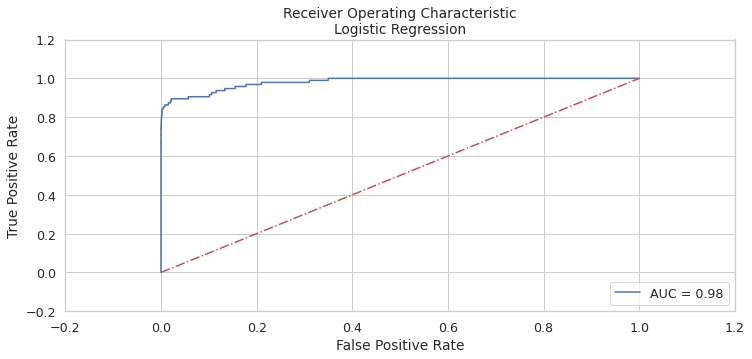

In [ ]:
auc=metrics.roc_auc_score(original_ytest,y_logreg_prob)
# Plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(original_ytest,y_logreg_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### KNN Classifier

In [ ]:
# KNN Classifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_sm,y_sm)
y_knn=knn.predict(original_Xtest)
y_knn_prob=knn.predict_proba(original_Xtest)[:,1]

In [ ]:
# Metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(original_ytest,y_knn))
print("Accuracy:",metrics.accuracy_score(original_ytest,y_knn))
print("Precision:",metrics.precision_score(original_ytest,y_knn))
print("Recall:",metrics.recall_score(original_ytest,y_knn))
print("F1-Score:",metrics.f1_score(original_ytest,y_knn))
print("AUC:",metrics.roc_auc_score(original_ytest,y_knn))

Confusion Matrix:

 [[56586    64]

 [   19    76]]

Accuracy: 0.9985373160630893

Precision: 0.5428571428571428

Recall: 0.8

F1-Score: 0.6468085106382978

AUC: 0.8994351279788173


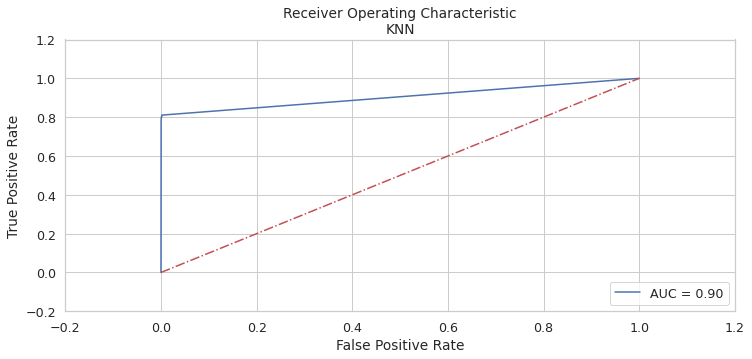

In [ ]:
auc=metrics.roc_auc_score(original_ytest,y_knn)
# Plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(original_ytest,y_knn_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nKNN')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest Classifier

In [ ]:
RF_model = RandomForestClassifier(class_weight = "balanced", random_state = 42)
RF_model.fit(original_Xtrain, original_ytrain)
RF_feature_imp = pd.DataFrame(index=X.columns, data = RF_model.feature_importances_, columns = ['Importance']).sort_values("Importance", ascending = False)
RF_feature_imp

,Importance
V14,0.206320
V12,0.157402
V4,0.092594
V10,0.090721
V17,0.072795
V11,0.067187
V7,0.036772
V3,0.035073
V16,0.030249
V2,0.022589


In [ ]:
import plotly.express as px
fig = px.bar(RF_feature_imp.sort_values('Importance', ascending = False), x = RF_feature_imp.sort_values('Importance', 
             ascending = False).index, y = 'Importance', title = "Feature Importance", 
             labels = dict(x = "Features", y ="Feature_Importance"))
fig.show()

In [ ]:
# RandomForest Classifier
rf=RandomForestClassifier(random_state=3)
rf.fit(X_sm,y_sm)
y_rf=rf.predict(original_Xtest)
y_rf_prob=rf.predict_proba(original_Xtest)[:,1]

In [ ]:
# Metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(original_ytest,y_rf))
print("Accuracy:",metrics.accuracy_score(original_ytest,y_rf))
print("Precision:",metrics.precision_score(original_ytest,y_rf))
print("Recall:",metrics.recall_score(original_ytest,y_rf))
print("F1-Score:",metrics.f1_score(original_ytest,y_rf))
print("AUC:",metrics.roc_auc_score(original_ytest,y_rf))

Confusion Matrix:

 [[56649     1]

 [   30    65]]

Accuracy: 0.9994536963609129

Precision: 0.9848484848484849

Recall: 0.6842105263157895

F1-Score: 0.8074534161490684

AUC: 0.8420964370325636


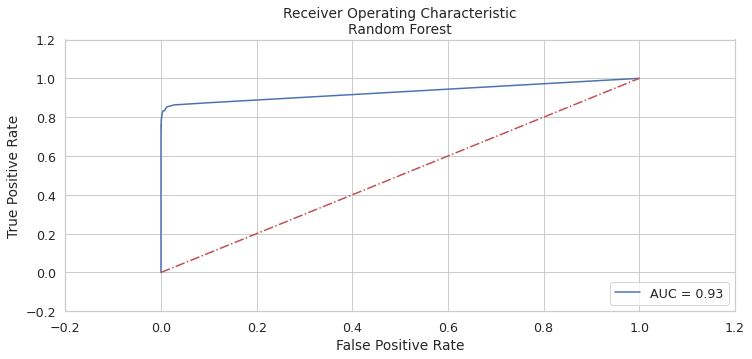

In [ ]:
auc=metrics.roc_auc_score(original_ytest,y_rf_prob)
# Plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(original_ytest,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Conclusion

* We investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features. 
* Implemented SMOTE on our imbalanced dataset helped us with the imbalance of our labels (more no fraud than fraud transactions).
*  Removal of outliers was not implemented which can be done in future work and see if that will affect our model performance.
* After comparison between models, we found that *Logistic Regression Classifier* with SMOTE gave us the best result.